## Introduction

<img src='https://www.aurecongroup.com/-/media/images/aurecon/content/expertise/digital-engineering-advisory/machine-learning/aurecon-machine-learning-large-banner.jpg?w=1170&h=417&as=1&crop=1'>

<a id="000"></a><br>

**CONTENT**

1. [Exploratory Data Analysis](#0)
1. [Linear Regression](#1)
1. [Decision Tree](#2)
1. [Random Forest](#3)
1. [Logistic Regression](#4)
1. [K-Nearest Neighbor](#5)
1. [Naive Bayes](#6)
1. [SVM](#7)
1. [Nu-Support Vector Classification](#8)
1. [Linear Support Vector Classification](#9)
1. [Gradient Boosting Classifier](#10)
1. [End Of Notebook](#100)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import pandas as pd #data processing, CSV File(I/O)
import numpy as np #linear algebra

#Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") # ignore warnings


from sklearn.metrics import classification_report #Build a text report showing the classification metrics.
from sklearn.metrics import accuracy_score #Accuracy classification score.
from sklearn.metrics import confusion_matrix #Compute confusion matrix to evaluate the accuracy of a classification.

In [3]:
#Read CSV file into data
data = pd.read_csv('../input/iris/Iris.csv')

<a id="0"></a><br>
# 0.EDA

In [4]:
# to see features and target variable
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
r,c = data.shape
print("Data has ",r," Rows")
print("Data has ",c," Columns")

Data has  150  Rows
Data has  6  Columns


In [6]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As you can see:
 * > Length: 150 (range index)
 * > Features are float except for Id which is integer
 * > Target variables are object that is like string

In [7]:
# for statistical analysis
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Scatter Plot: SepalWidth vs PetalWidth of different Species

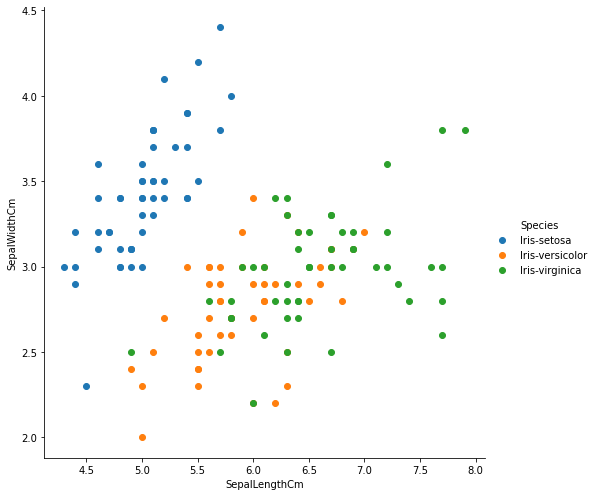

In [8]:
sns.FacetGrid(data, hue='Species', height=7)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

#### Countplot: of Flower Species

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

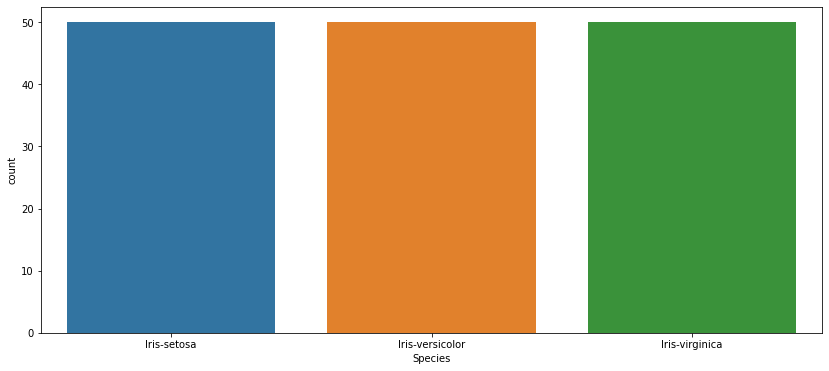

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x="Species", data=data)
data.loc[:,'Species'].value_counts()

#### Pairplot:

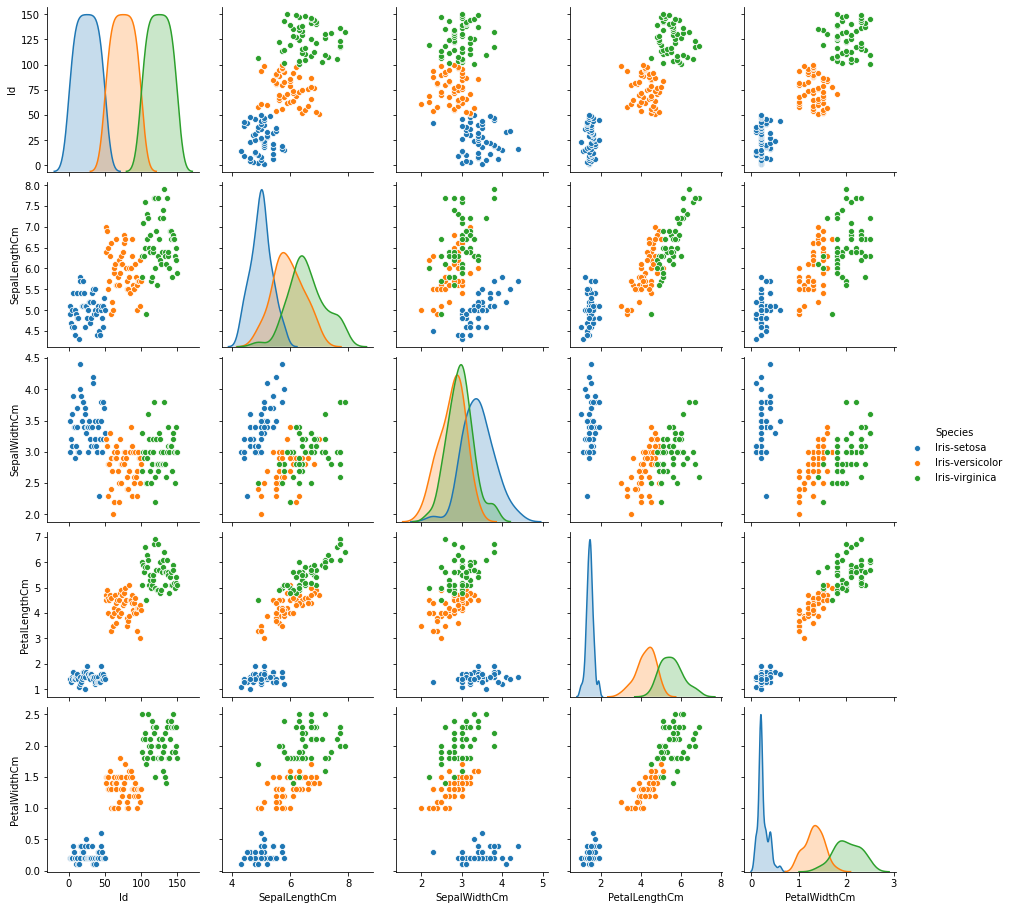

In [10]:
sns.pairplot(data, hue='Species')

In [11]:
X = data.iloc[:,:-1].values #Feature Variables
y = data.iloc[:,-1].values #Target Variable

In [12]:
#Splitting Feature and Target Variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a id="1"></a><br>
# 1.Linear Regression

Linear regression is a basic and commonly used type of predictive analysis.
* Supervised learning
* We have converted 3 Species into Numerical Values. This will enable us to apply Linear Regression to given Data.
* **y = ax + b** where y = target, x = feature and a = parameter of model
* In regression problems target value is continuously varying variable such as price of house or sacral_slope.

In [13]:
XL = data.iloc[:, :-1].values    #   X -> Feature Variables
yL = data.iloc[:, -1].values #   y ->  Target Variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train= le.fit_transform(yL)
print(Y_train)  # this is Y_train categotical to numerical

X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, Y_train, test_size = 0.3, random_state = 0) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
#Linear Regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

#Fit
modelLR.fit(X_trainL, y_trainL)

#Predict
Y_pred = modelLR.predict(X_testL)

In [15]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : -0.02429852351984696
beta coefficients       : [ 0.00680677 -0.10726764 -0.00624275  0.22428158  0.27196685]
Mean Abs Error MAE      : 0.1496683549052497
Mean Sqrt Error MSE     : 0.032554517379698125
Root Mean Sqrt Error RMSE: 0.18042870442282216
r2 value                : 0.9446026069799255


<a id="2"></a><br>
# 2.Decision Tree

* A decision tree is a **decision support tool** that uses a tree-like graph with model of decisions and their possible consequences.
* It is a way to display an algorithm **that only contains conditional control statements**.
* A decision tree is a **flowchart-like structure** in which :
  * each **internal node represents a “test” on an attribute** *(e.g. whether a coin flip comes up heads or tails)*,
  * each **branch represents the outcome of the test**,
  * and each **leaf node represents a class label** *(decision taken after computing all attributes)*.
  
<img src="https://miro.medium.com/max/820/0*LHzDR-s89Ggfqn7p.png">

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
accuracy is 0.9777777777777777


In [17]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets #way to access preprovided data in sklearn

# Loading example data
iris = datasets.load_iris()
X1 = iris.data[:, [0, 2]] #Features
y1 = iris.target  #Target

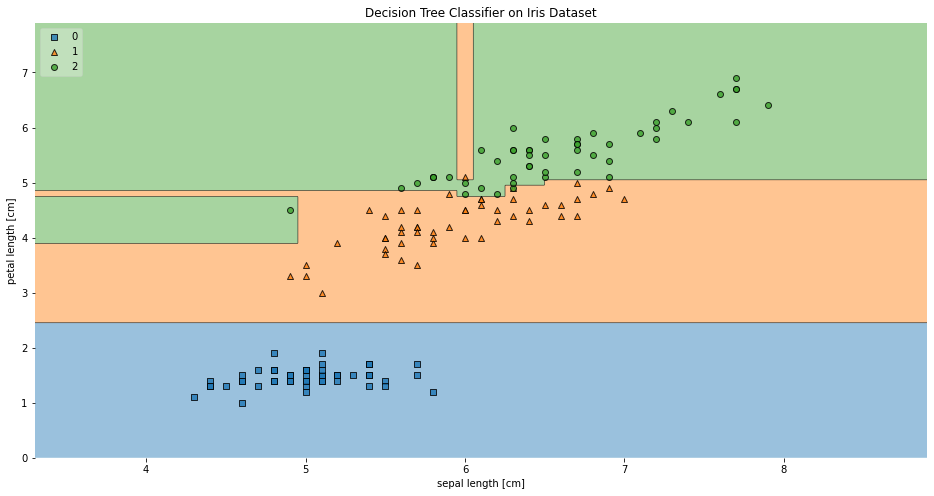

In [18]:
# Training a classifier
tree = DecisionTreeClassifier()
tree.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=tree, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree Classifier on Iris Dataset')
plt.show()


<a id="3"></a><br>
# 3. Random Forest

* The Random Forest Classifier is a set of decision trees from randomly selected subset of training set.
* It **aggregates the votes from different decision trees** to decide the final class of the test object.
* It is an ensemble tree-based learning algorithm.
    * Ensemble algorithms are those which combines more than one algorithms of same or different kind for classifying objects.
* It is one of the most accurate learning algorithms available. For many data sets, it produces a **highly accurate classifier**.
* It runs efficiently on large databases.
* It can handle **thousands of input variables** without variable deletion.

<img src='https://miro.medium.com/max/1200/1*5dq_1hnqkboZTcKFfwbO9A.png'>

In [19]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is  1.0


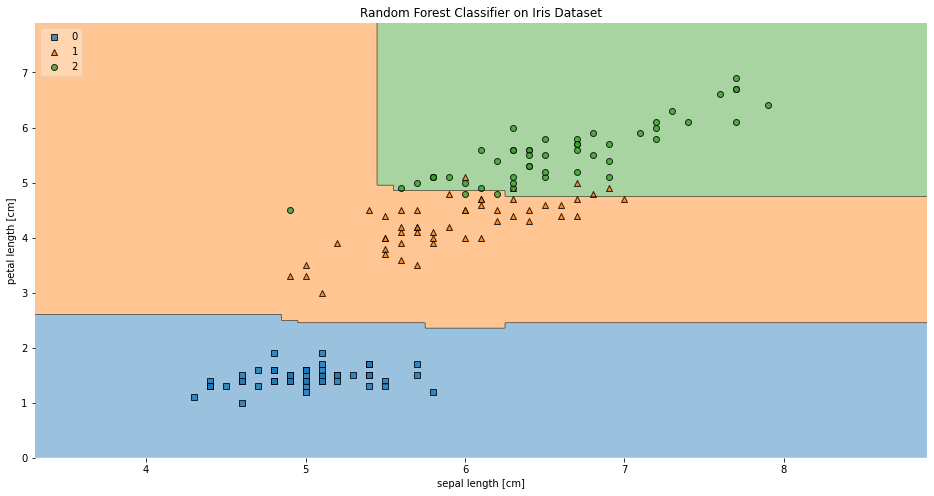

In [20]:
# Training a classifier
forest = RandomForestClassifier(max_depth=2)
forest.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=forest, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random Forest Classifier on Iris Dataset')
plt.show()


<a id="4"></a><br>
# 4. Logistic Regression

* Logistic Regression is used when the **dependent variable(target) is categorical**.
* For Example:
        * To predict whether an email is spam (1) or (0)
        * Whether the tumor is malignant (1) or not (0)
* Logistic regression is named for the function used at the core of the method, **the Logistic Function** (also called Sigmoid Function).
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

In [21]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


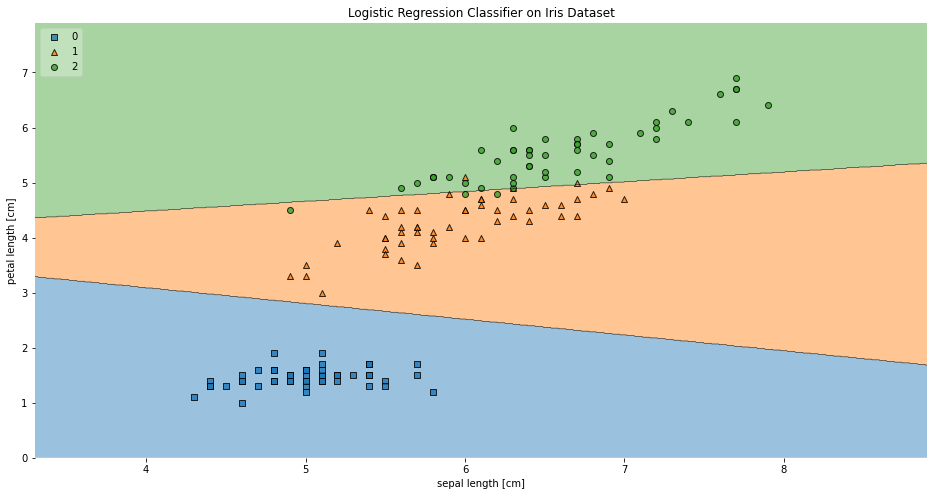

In [22]:
# Training a classifier
lr = LogisticRegression()
lr.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Logistic Regression Classifier on Iris Dataset')
plt.show()


<a id="5"></a><br>
# 5. K- Nearest Neighbor

* The KNN algorithm assumes that **similar things exist in close proximity**.
* In other words, similar things are near to each other.
        Birds of a feather flock together.
* KNN captures the **idea of similarity** (sometimes called distance, proximity, or closeness).
* KNN is used **for recommending products on Amazon, posts on Facebook, movies on Netflix, or videos on YouTube**.
* KNN can be used for both classification and regression predictive problems.
  * However, it is more widely used in classification problems in the industry.
  
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png">

In [23]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


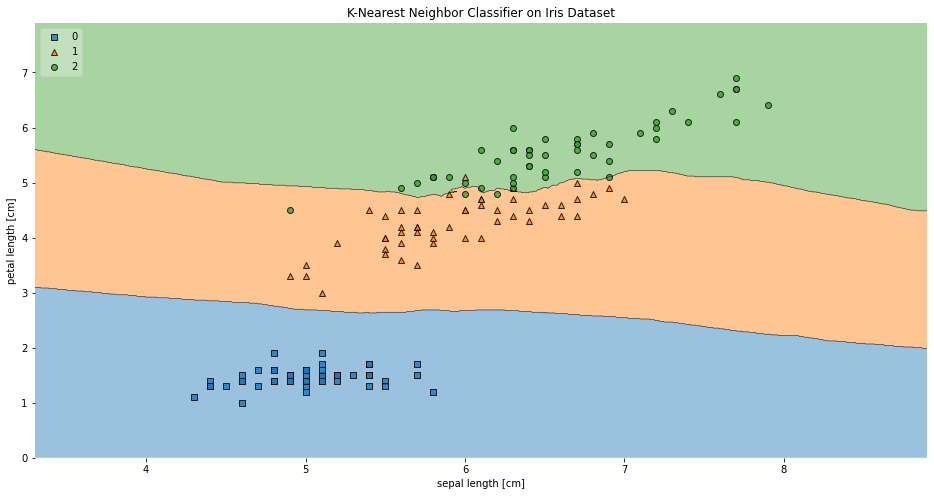

In [24]:
# Training a classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('K-Nearest Neighbor Classifier on Iris Dataset')
plt.show()


<a id="6"></a><br>
# 6. Naive Bayes

* Naive Bayes is a **statistical classification technique** based on **Bayes Theorem**.
* Naive Bayes classifier assumes that the **effect of a particular feature in a class is independent of other features**.
* For example :- a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location.
  * Even if these features are interdependent, these **features are still considered independently**.
  * This assumption **simplifies computation**, and that's why it is considered as naive.
  * This assumption is called **class conditional independence**.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_4_lyi0ob.png">

In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


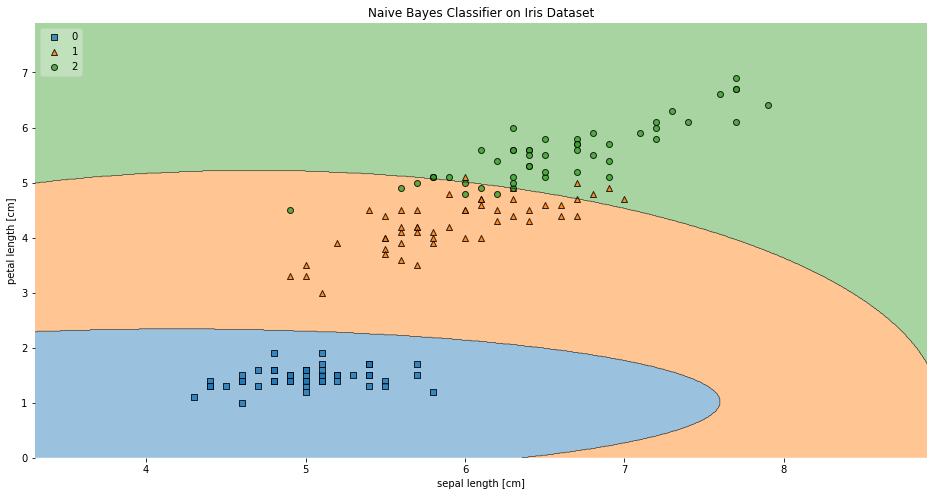

In [26]:
# Training a classifier
nb = GaussianNB()
nb.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=nb, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Naive Bayes Classifier on Iris Dataset')
plt.show()


<a id="7"></a><br>
# 7. SVM

* The **goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes** so that we can easily put the new data point in the correct category in the future.
* This best decision boundary is called a **hyperplane**.
* The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as **Support Vector**.
* SVM algorithm can be used for Face detection, image classification, text categorization, etc.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png">

In [27]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


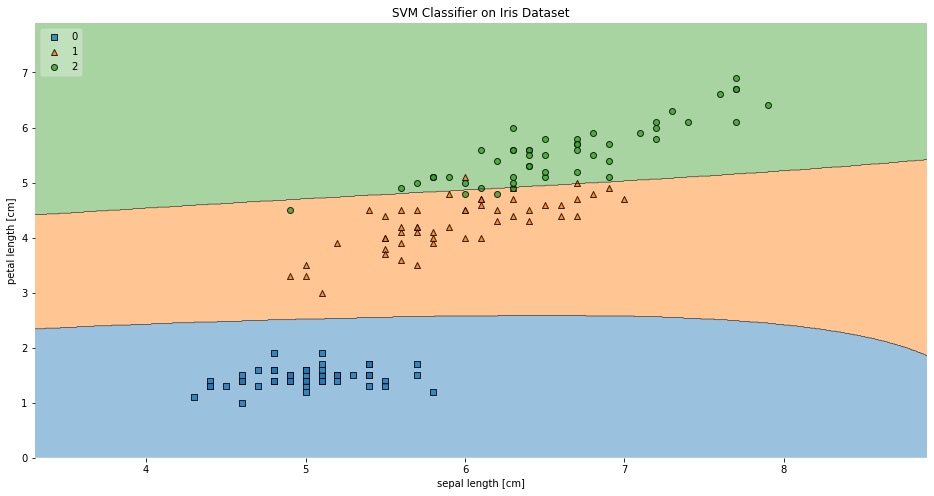

In [28]:
# Training a classifier
svm = SVC()
svm.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM Classifier on Iris Dataset')
plt.show()


<a id="8"></a><br>
# 8. Nu - Support Vector Classification

* It is like SVC but NuSVC accepts slightly different sets of parameters.
* The parameter which is different from SVC is as follows −
         nu − float, optional, default = 0.5
* It represents an **upper bound** on the fraction of training errors and a **lower bound** of the fraction of support vectors.
* Its value should be in the **interval of (o,1]**.

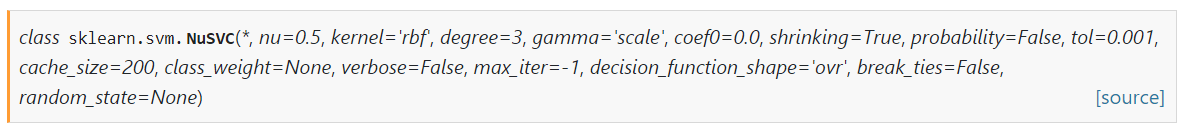

In [29]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


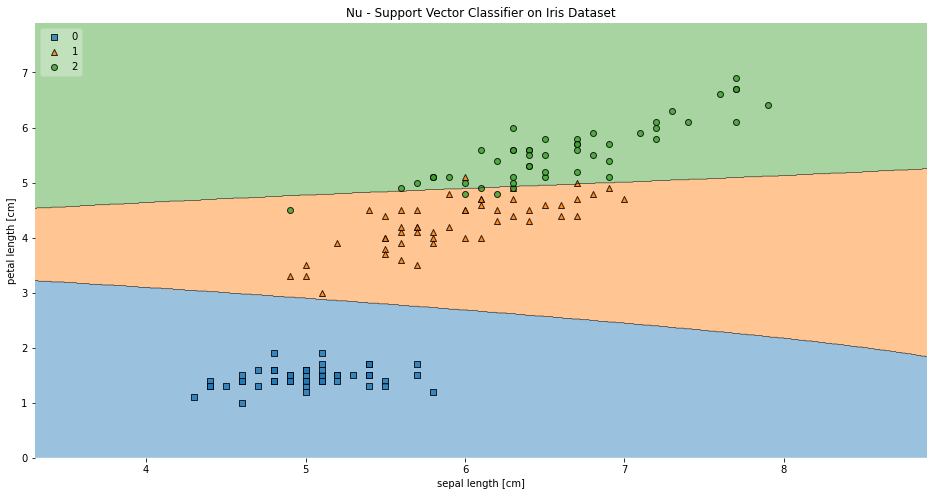

In [30]:
# Training a classifier
NuSupport = NuSVC()
NuSupport.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=NuSupport, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Nu - Support Vector Classifier on Iris Dataset')
plt.show()


<a id="9"></a><br>
# 9. Linear Support Vector Classification

* Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
* Solution of **multiclass classification problems** with any number of classes.
* This class supports both **dense and sparse input** and the multiclass support is handled according to a one-vs-the-rest scheme.
* Ideal for contemporary applications in digital advertisement, e-commerce, web page categorization, text classification, bioinformatics, proteomics, banking services and many other areas.

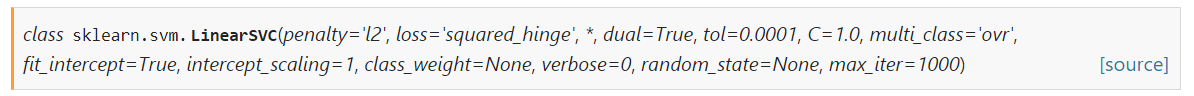

In [31]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.86      1.00      0.92        18
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.93        45
      macro avg       0.95      0.91      0.92        45
   weighted avg       0.94      0.93      0.93        45

[[16  0  0]
 [ 0 18  0]
 [ 0  3  8]]
accuracy is 0.9333333333333333


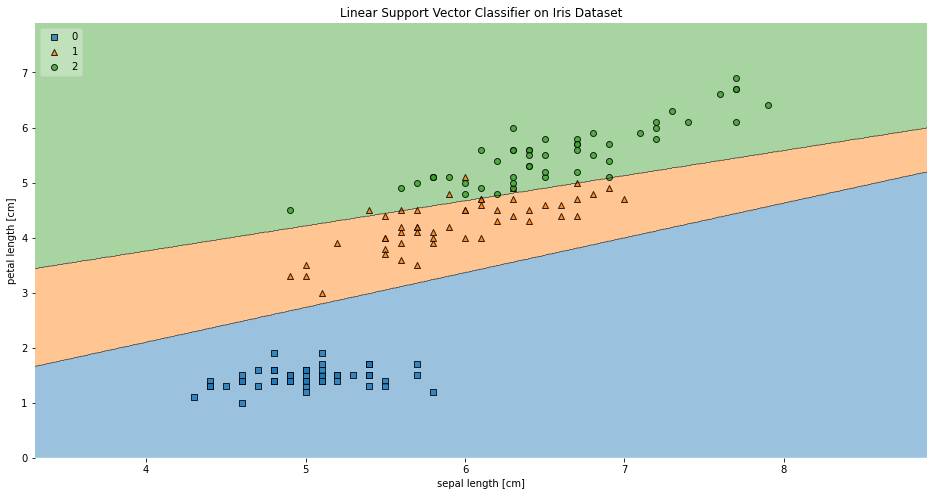

In [32]:
# Training a classifier
LinearSupport = LinearSVC()
LinearSupport.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=LinearSupport, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Linear Support Vector Classifier on Iris Dataset')
plt.show()


<a id="10"></a><br>
# 10. Gradient Boosting Classifier

* Gradient boosting is one of the most powerful techniques for building **predictive models**.
* The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
* A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
* Gradient boosting is a **greedy algorithm** and can overfit a training dataset quickly.
* GB builds an additive model in a forward stage-wise fashion.

<img src="https://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png">

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 18  1]
 [ 0  0 10]]
accuracy is  0.9777777777777777


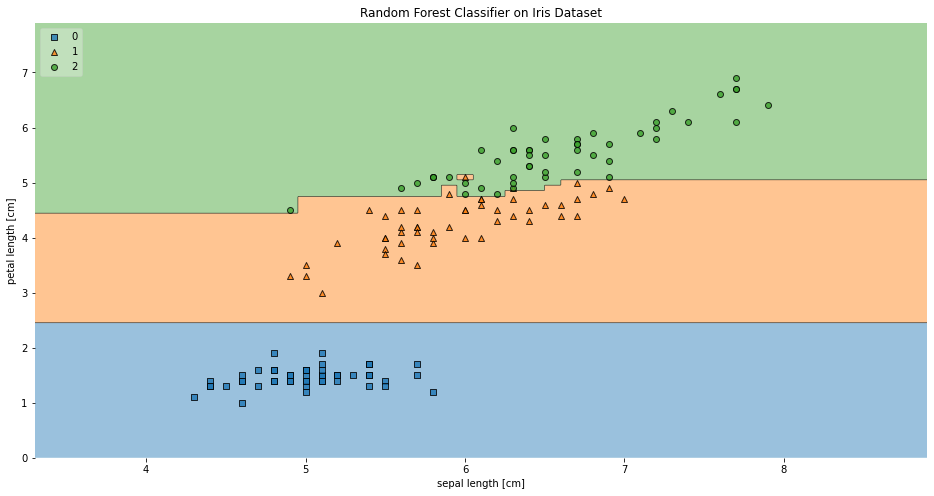

In [34]:
# Training a classifier
gboost=GradientBoostingClassifier()
gboost.fit(X1, y1)

# Plotting decision regions
plt.figure(figsize=(16,8))
plot_decision_regions(X1, y1, clf=gboost, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random Forest Classifier on Iris Dataset')
plt.show()


<a id="100"></a><br>
# Conclusion

### If you have any question or suggestion, I will be happy to hear it.

<a id="1000"></a><br>
[**Goto Top of the Notebook**](#000)